In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
df = pd.read_csv("Hotel_Reservations.csv")

In [6]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
df.drop(columns=["Booking_ID"], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [10]:
df.shape

(36275, 18)

In [11]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(26000, 18)

In [21]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     20398
Not Selected     4463
Meal Plan 2      1134
Meal Plan 3         5
Name: count, dtype: int64

In [22]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [23]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest', 'booking_status' ]

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

### Data Analysis

In [26]:
data = df.copy()

In [27]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Univarite analysis

In [33]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette='Blues')
        axes[i][0].set_title(f'Histogram of {column}')
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette='Blues')
        axes[i][1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

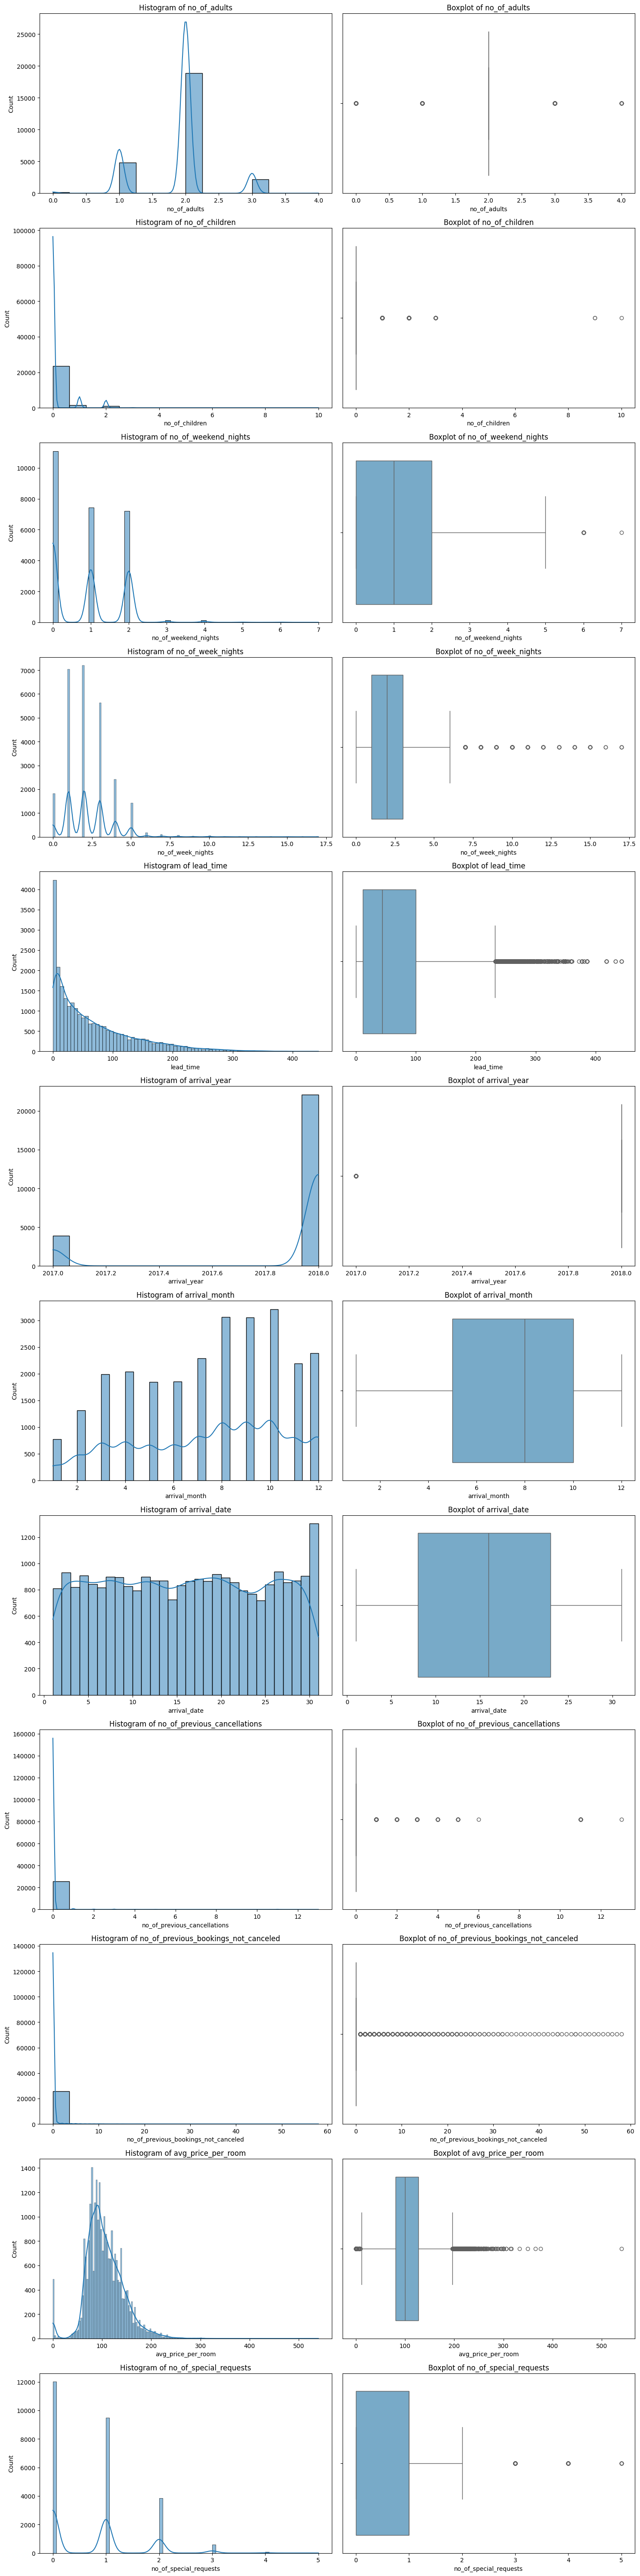

In [34]:
num_plot_dist(data, num_cols)

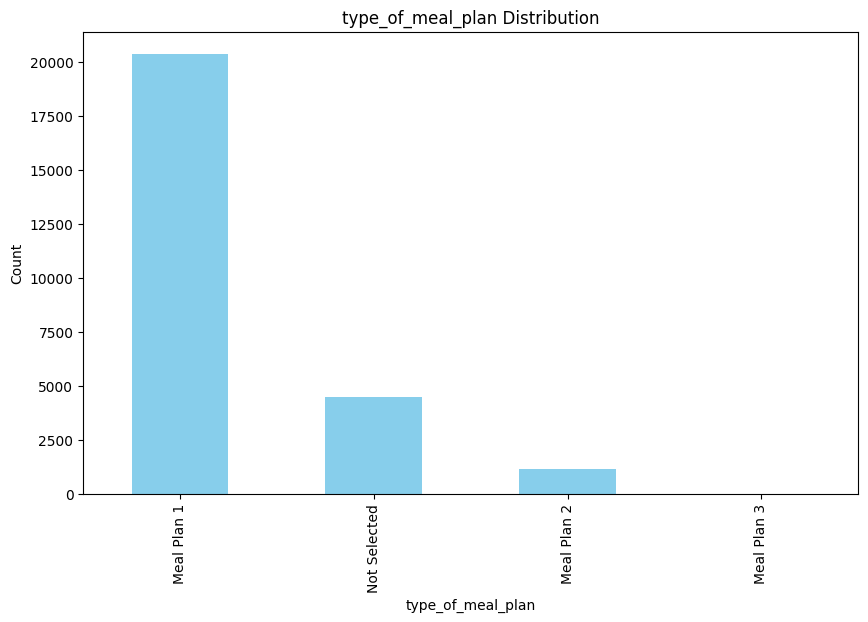

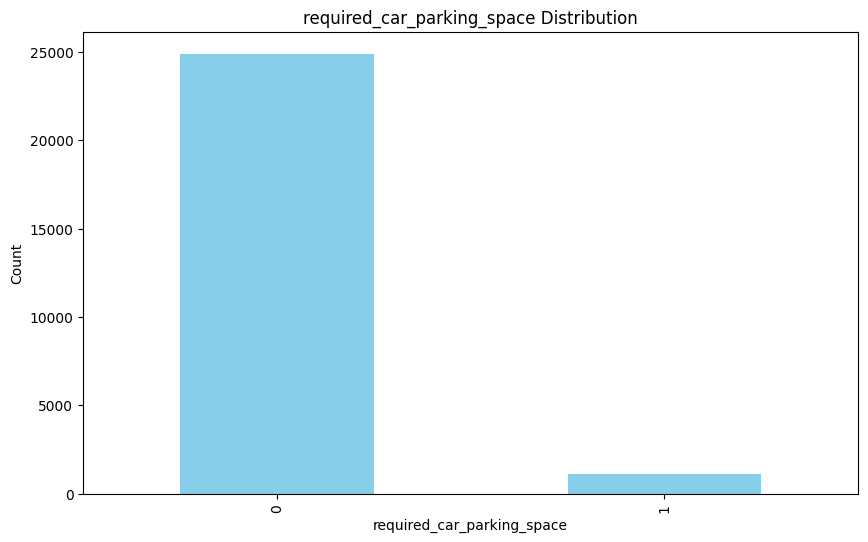

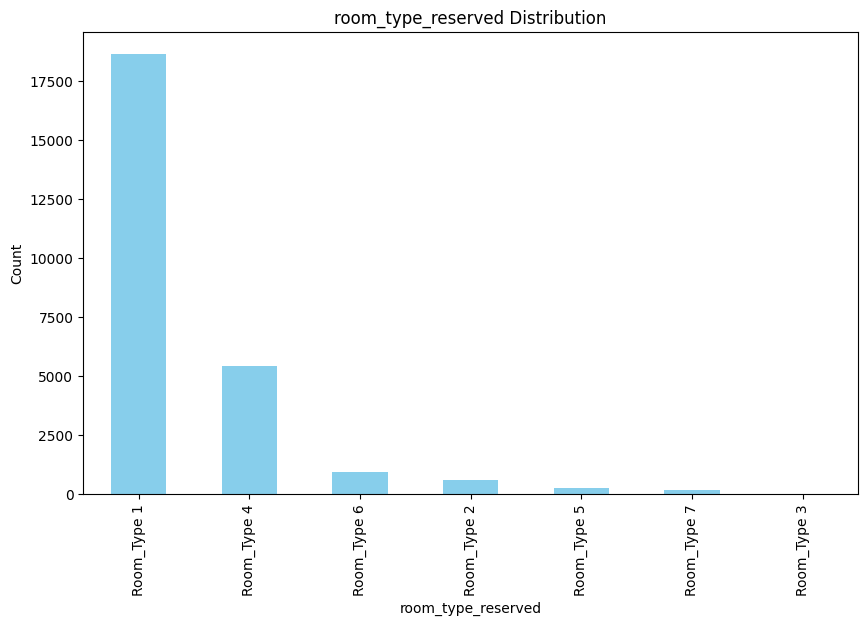

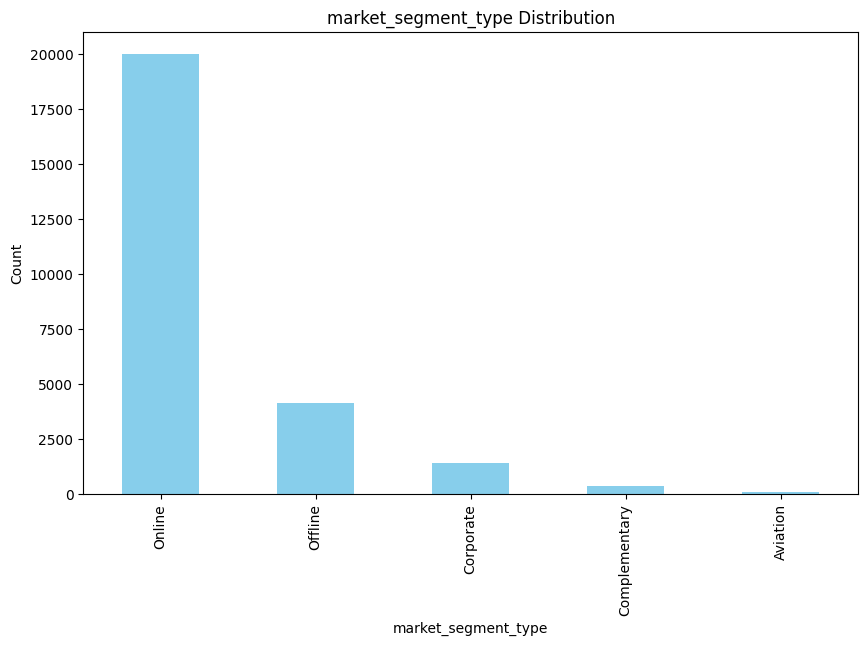

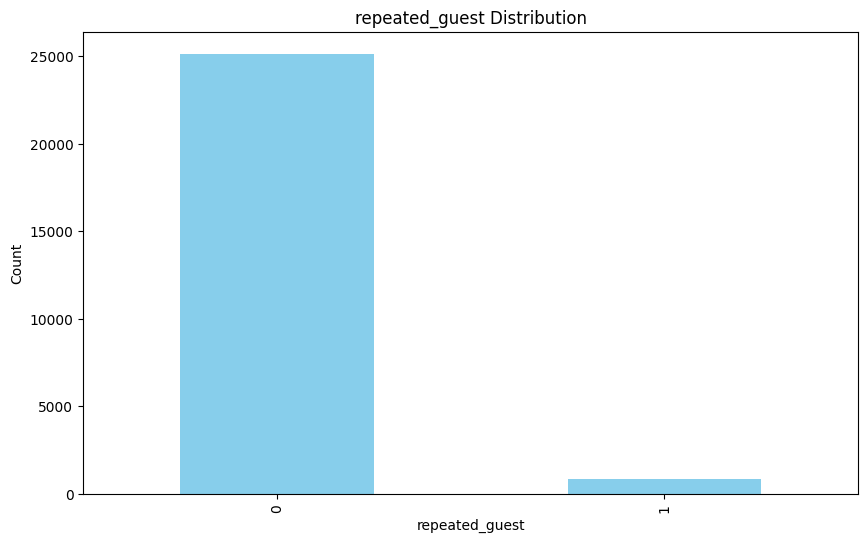

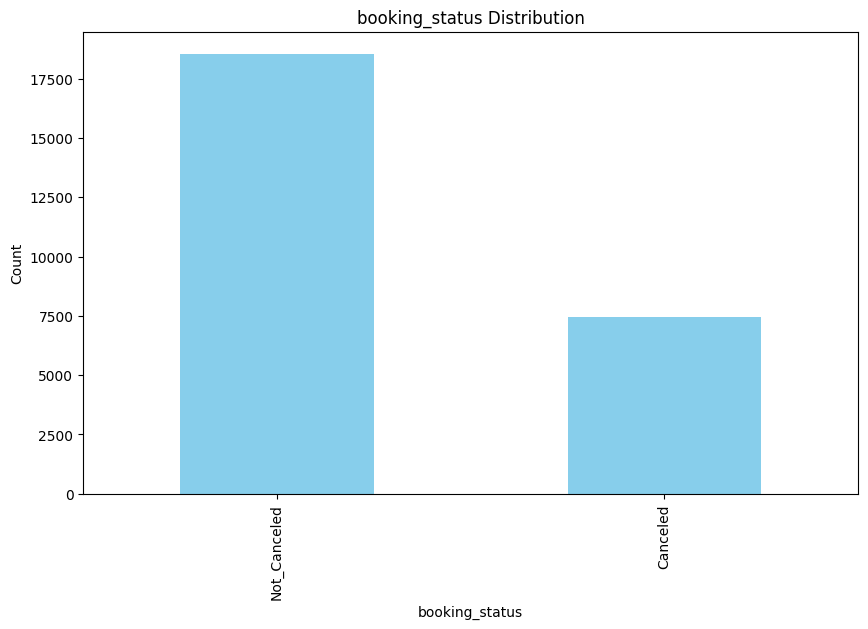

In [35]:
for cat_features in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_features].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{cat_features} Distribution')
    plt.xlabel(cat_features)
    plt.ylabel('Count')
    plt.show()
    

### Bivariate Analysis

In [36]:
def plot_bivariate_nums(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, data=df, ax=axes[i], palette='Blues')
        axes[i].set_title(f'{target} vs {column}')

    plt.tight_layout()
    plt.show()


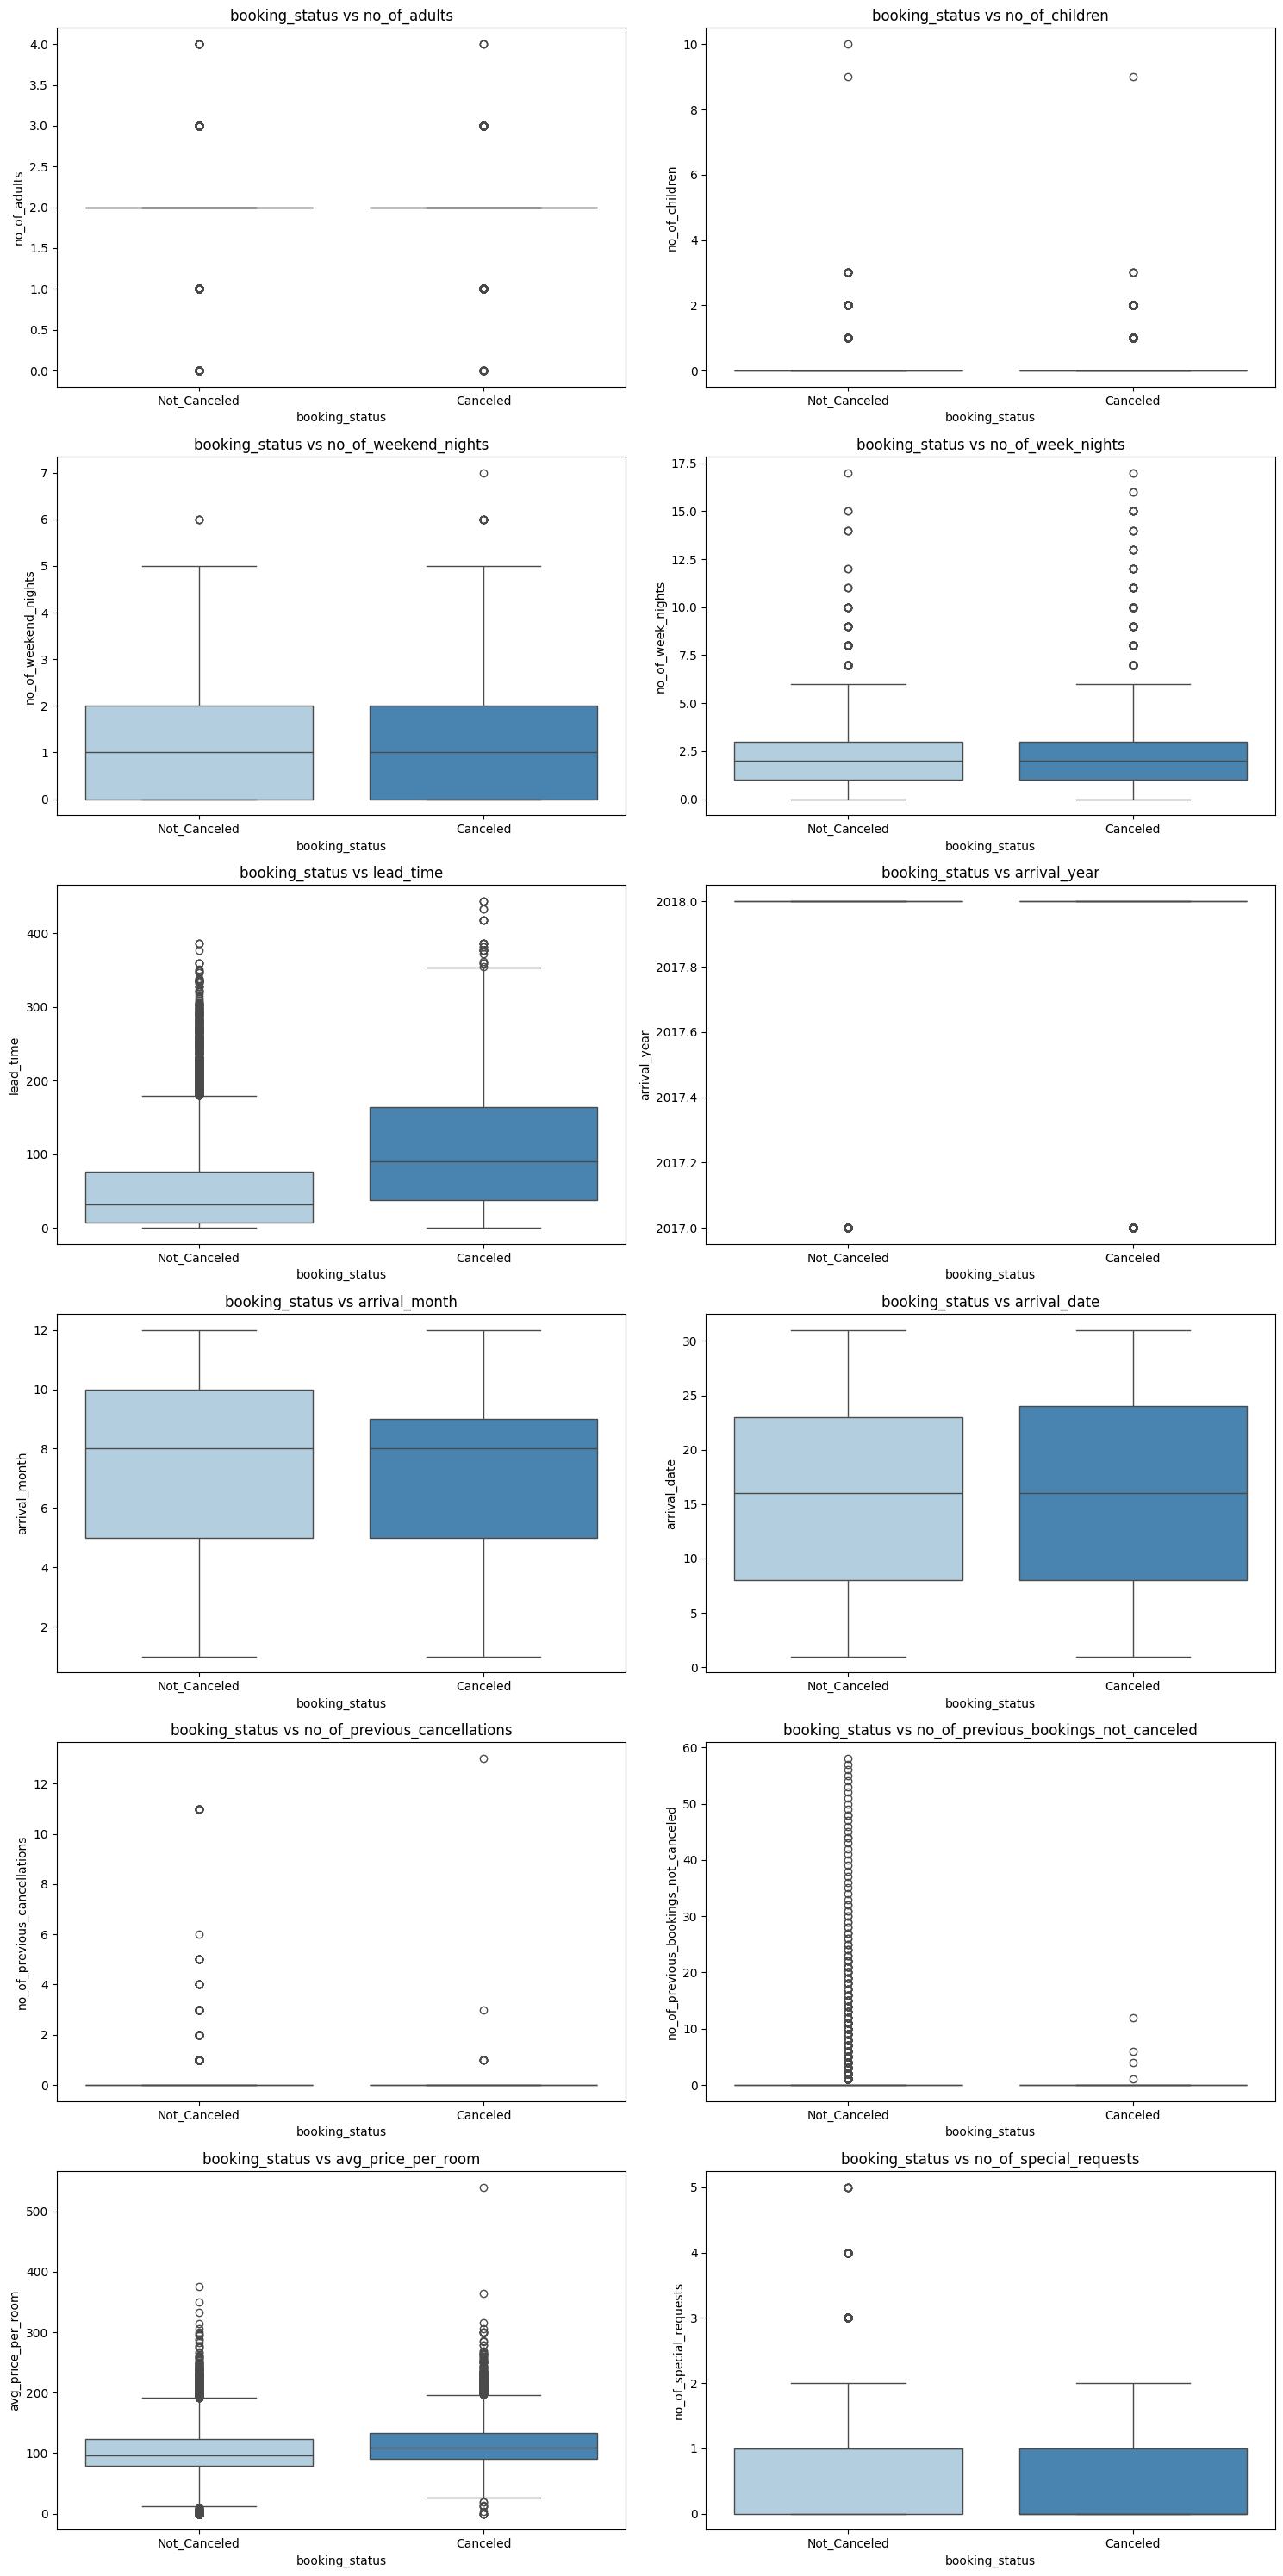

In [37]:
plot_bivariate_nums(data, 'booking_status', num_cols)

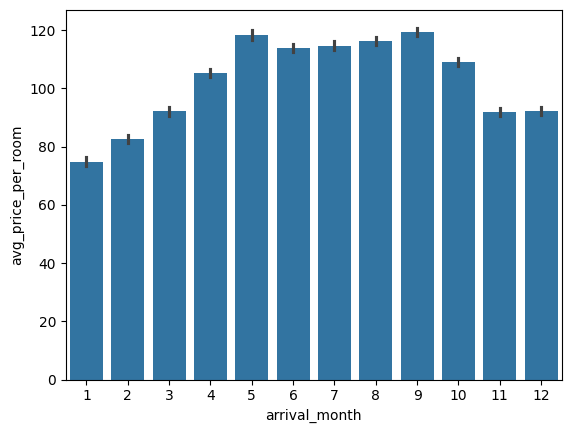

In [39]:
sns.barplot(data=data, x='arrival_month', y='avg_price_per_room')
plt.show()

In [40]:
def plot_bivariate_cats(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1)//2

    fig,axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f'{target} vs {feature}')
        axes[i].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

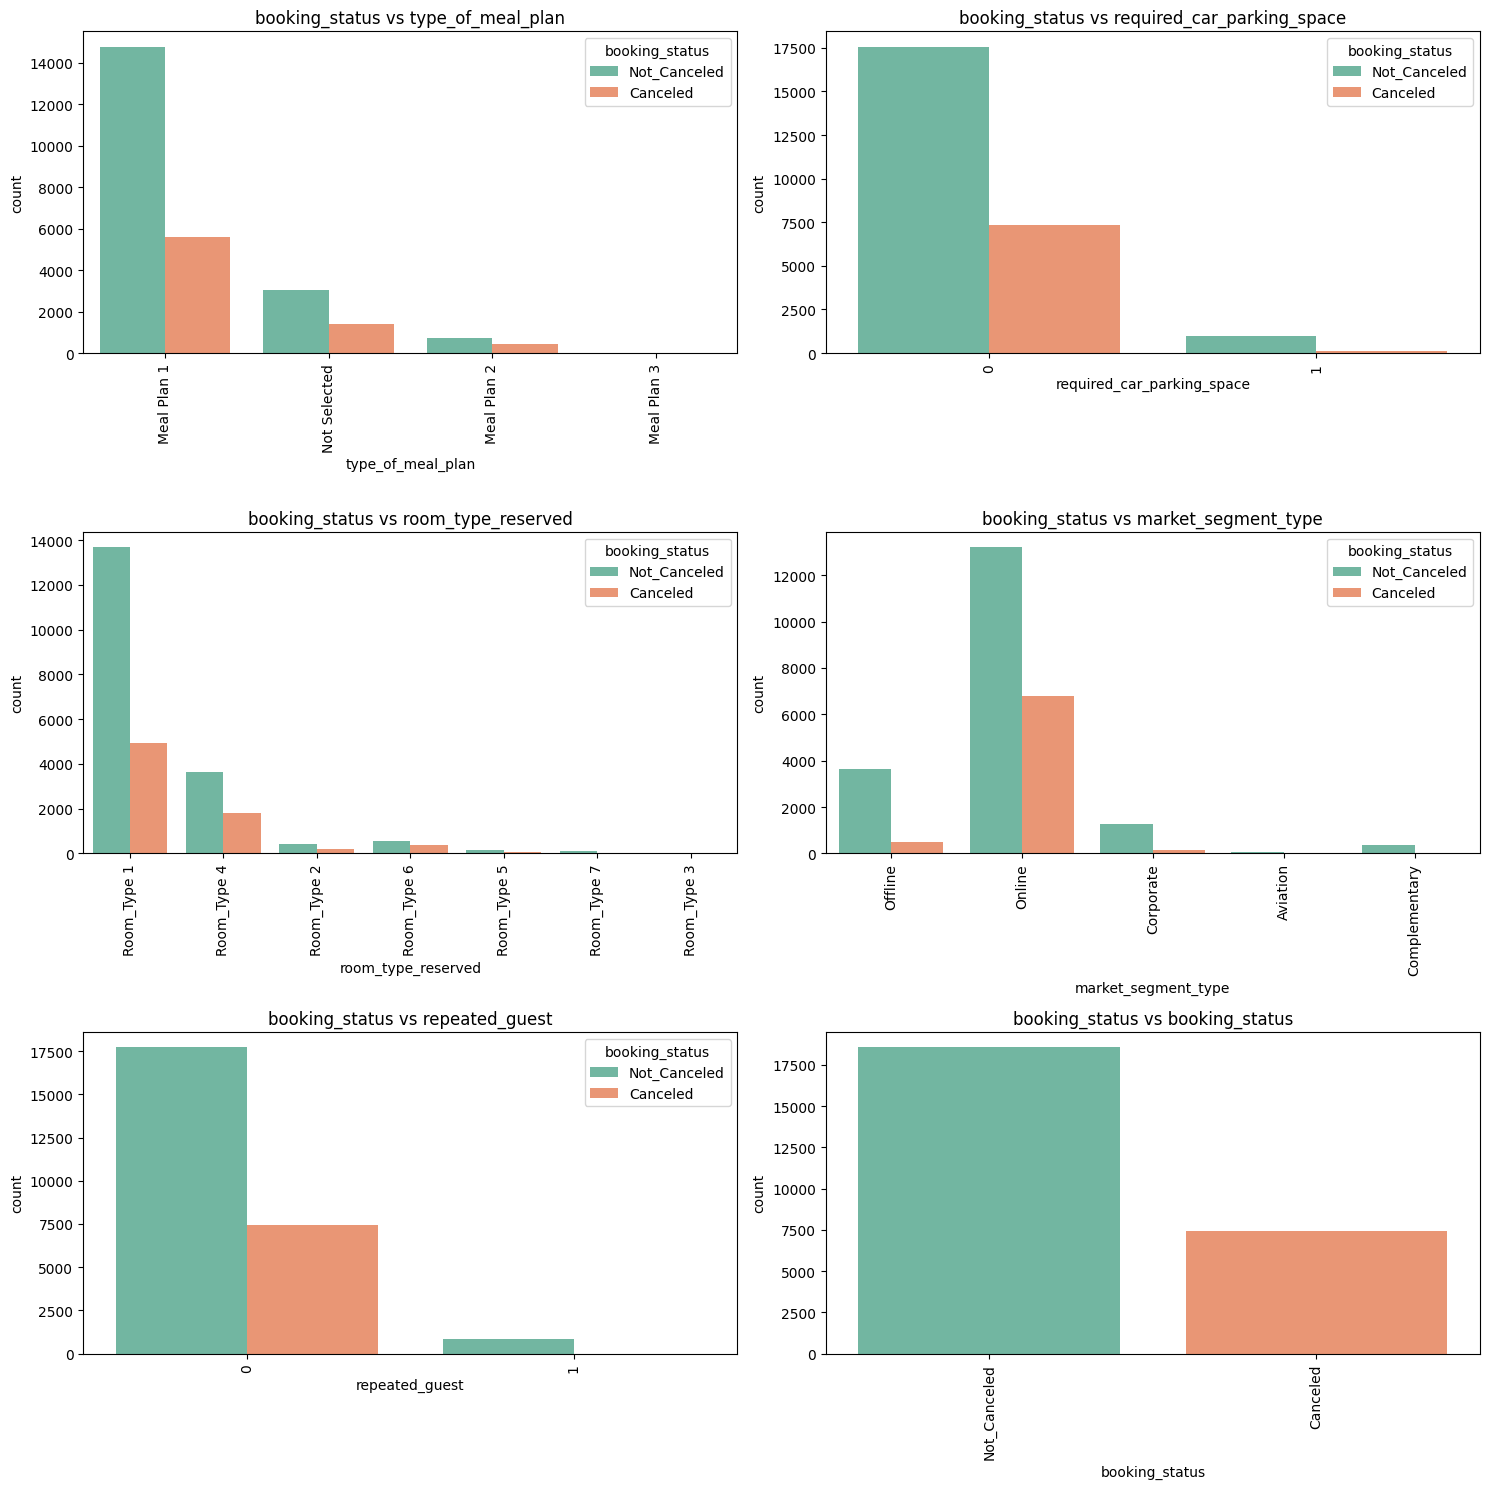

In [41]:
plot_bivariate_cats(data, 'booking_status', cat_cols)

### Data Preprocessing

In [43]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

### Label encoding


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
label_encoder = LabelEncoder()

In [48]:
mappings = {}

for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])
    # Store the mapping of original labels to encoded labels
    mappings[column] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    
    print(f'Mappings for {column}: {mappings[column]}')


Mappings for type_of_meal_plan: {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}
Mappings for required_car_parking_space: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Mappings for room_type_reserved: {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
Mappings for market_segment_type: {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
Mappings for repeated_guest: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Mappings for booking_status: {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


In [49]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  int64  
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  int64  
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

### Multicolinerarity

In [51]:
!pip install statsmodels

     ---------------------------------------- 9.9/9.9 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 232.9/232.9 kB 7.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [55]:
X = add_constant(df)

vif_data = pd.DataFrame()  

vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [56]:
vif_data

,feature,VIF
0,const,4.129913e+07
1,no_of_adults,1.337855e+00
2,no_of_children,1.284896e+00
3,no_of_weekend_nights,1.077614e+00
4,no_of_week_nights,1.131223e+00
5,type_of_meal_plan,1.177405e+00
6,required_car_parking_space,1.032967e+00
7,room_type_reserved,1.555871e+00
8,lead_time,1.411162e+00
9,arrival_year,1.291251e+00


### Our Data don't have any multicolinearity

In [57]:
corr = df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

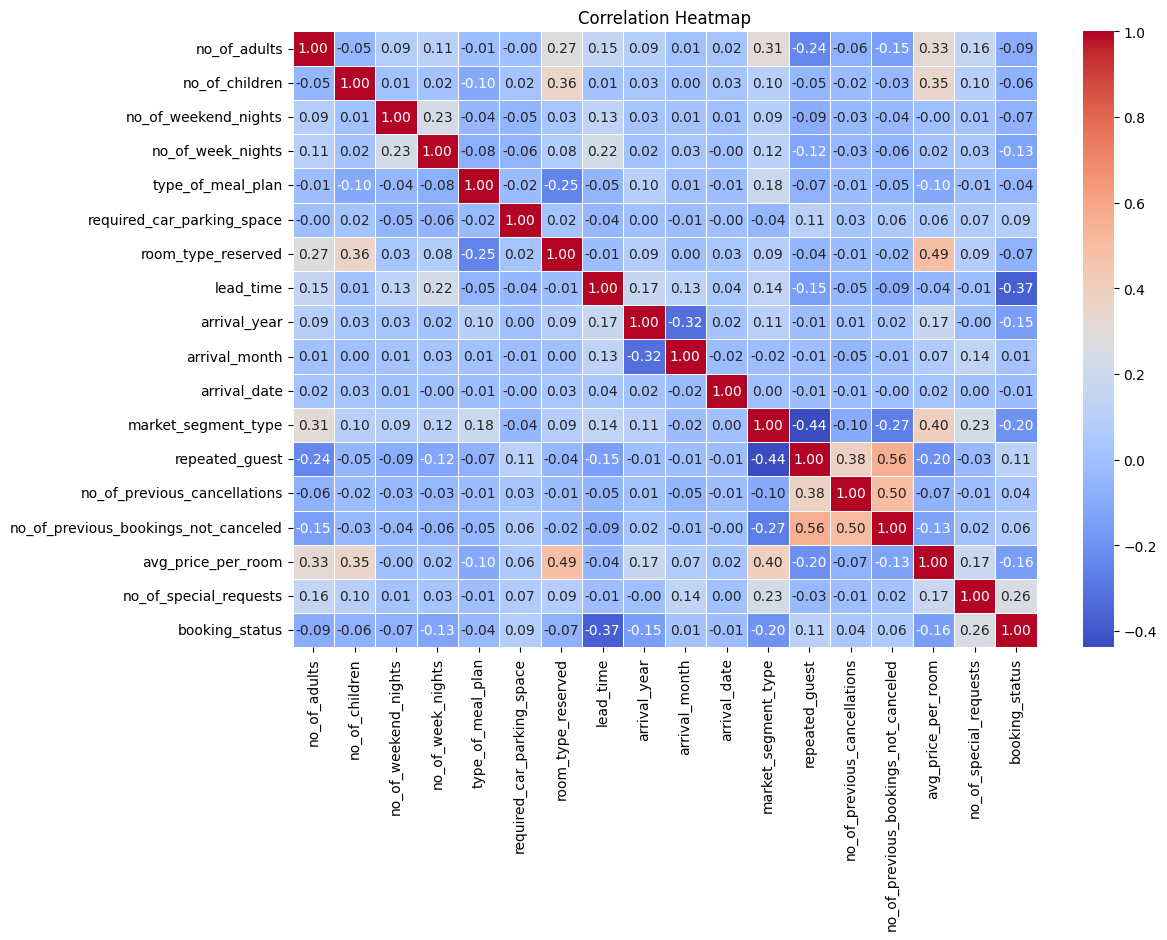

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

### Skewness

In [60]:
skewness = df.skew()

In [61]:
skewness

no_of_adults                            -0.297021
no_of_children                           4.005672
no_of_weekend_nights                     0.659718
no_of_week_nights                        1.601870
type_of_meal_plan                        1.638645
required_car_parking_space               4.559677
room_type_reserved                       1.373156
lead_time                                1.407857
arrival_year                            -1.963466
arrival_month                           -0.292238
arrival_date                             0.012177
market_segment_type                     -2.382309
repeated_guest                           5.249142
no_of_previous_cancellations            21.939192
no_of_previous_bookings_not_canceled    16.298982
avg_price_per_room                       0.588413
no_of_special_requests                   0.911121
booking_status                          -0.945939
dtype: float64

In [71]:
df['no_of_previous_cancellations'] = np.log1p(df['no_of_previous_cancellations'])
df['no_of_previous_bookings_not_canceled'] = np.log1p(df['no_of_previous_bookings_not_canceled'])

# Recalculate skewness to verify the reduction
skewness = df.skew()
skewness[['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']]

no_of_previous_cancellations            10.072169
no_of_previous_bookings_not_canceled     5.685156
dtype: float64

In [73]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [74]:
skewness

no_of_adults                            -0.297021
no_of_children                           3.014355
no_of_weekend_nights                     0.659718
no_of_week_nights                       -0.367823
type_of_meal_plan                        1.547515
required_car_parking_space               4.559677
room_type_reserved                       1.094651
lead_time                               -0.733408
arrival_year                            -1.963466
arrival_month                           -0.292238
arrival_date                             0.012177
market_segment_type                     -2.382309
repeated_guest                           5.249142
no_of_previous_cancellations            10.072169
no_of_previous_bookings_not_canceled     5.685156
avg_price_per_room                       0.588413
no_of_special_requests                   0.911121
booking_status                          -0.945939
dtype: float64

### Handle Imbalance Data

In [75]:
df["booking_status"].value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

1 is not cancelled
0 is cancalled

In [76]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [77]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [81]:
!pip install imbalanced-learn

     -------------------------------------- 238.4/238.4 kB 4.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
y.value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

<Axes: xlabel='booking_status'>

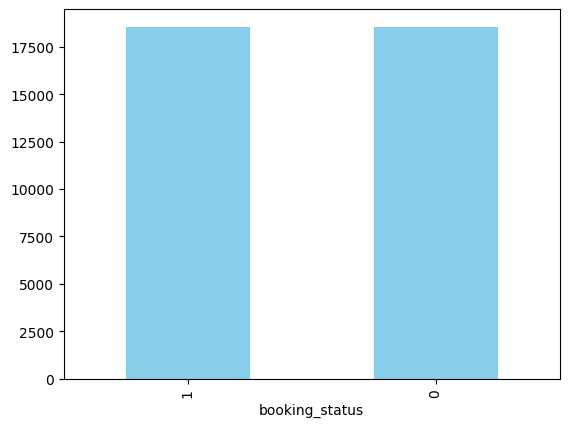

In [85]:
pd.Series(y_resampled).value_counts().plot(kind='bar', color='skyblue')

In [88]:
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df["booking_status"] = y_resampled
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0.0,1,1.098612,0.000000,0.0,0.0,5.416100,2017,10,2,3,0.0,0.0,0.0,65.00,0,1
1,2,0.0,2,1.386294,1.386294,0.0,0.0,1.791759,2018,11,6,4,0.0,0.0,0.0,106.68,1,1
2,1,0.0,2,0.693147,0.000000,0.0,0.0,0.693147,2018,2,28,4,0.0,0.0,0.0,60.00,0,0
3,2,0.0,0,1.098612,0.000000,0.0,0.0,5.356586,2018,5,20,4,0.0,0.0,0.0,100.00,0,0
4,2,0.0,1,0.693147,1.386294,0.0,0.0,3.891820,2018,4,11,4,0.0,0.0,0.0,94.50,0,0


In [89]:
balanced_df.shape

(37116, 18)

In [90]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37116 entries, 0 to 37115
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          37116 non-null  int64  
 1   no_of_children                        37116 non-null  float64
 2   no_of_weekend_nights                  37116 non-null  int64  
 3   no_of_week_nights                     37116 non-null  float64
 4   type_of_meal_plan                     37116 non-null  float64
 5   required_car_parking_space            37116 non-null  float64
 6   room_type_reserved                    37116 non-null  float64
 7   lead_time                             37116 non-null  float64
 8   arrival_year                          37116 non-null  int64  
 9   arrival_month                         37116 non-null  int64  
 10  arrival_date                          37116 non-null  int64  
 11  market_segment_

In [91]:
df = balanced_df.copy()

In [92]:
df.shape

(37116, 18)

#### Feature Selection

In [93]:
len(df.columns)

18

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [96]:
model = RandomForestClassifier(random_state=42)

In [97]:
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [99]:
feature_importance =model.feature_importances_

In [100]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [101]:
feature_importance_df

,Feature,Importance
7,lead_time,0.252901
16,no_of_special_requests,0.168156
15,avg_price_per_room,0.135333
3,no_of_week_nights,0.090096
10,arrival_date,0.077375
9,arrival_month,0.075081
11,market_segment_type,0.060250
2,no_of_weekend_nights,0.027629
4,type_of_meal_plan,0.026917
6,room_type_reserved,0.023792


In [102]:
top_10_features = feature_importance_df['Feature'].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_week_nights,arrival_date,arrival_month,market_segment_type,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,5.416100,0,65.00,1.098612,2,10,3,1,0.000000,0.0,1
1,1.791759,1,106.68,1.386294,6,11,4,2,1.386294,0.0,1
2,0.693147,0,60.00,0.693147,28,2,4,2,0.000000,0.0,0
3,5.356586,0,100.00,1.098612,20,5,4,0,0.000000,0.0,0
4,3.891820,0,94.50,0.693147,11,4,4,1,1.386294,0.0,0


In [103]:
len(top_10_df.columns)

11

In [104]:
df = top_10_df.copy()

### Model Selection

In [106]:
!pip install xgboost lightgbm 

^C


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Projects\\HotelReservationPrediction\\venv\\Lib\\site-packages\\lightgbm\\bin\\lib_lightgbm.dll'
Check the permissions.


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 150.0/150.0 MB 618.6 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 102.5/102.5 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 4.2 MB/s eta 0:00:00
     ------------------------------------- 325.7/325.7 kB 85.5 kB/s eta 0:00:00


In [110]:
!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [112]:
from lightgbm import LGBMClassifier

In [111]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [116]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
}

In [117]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
    recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['F1 Score'].append(f1)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    

[LightGBM] [Info] Number of positive: 14922, number of negative: 14770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 29692, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502560 -> initscore=0.010239
[LightGBM] [Info] Start training from score 0.010239


In [118]:
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

In [119]:
metrics_df

,Model,Accuracy,F1 Score,Precision,Recall
9,LightGBM,0.886988,0.887549,0.865621,0.910616
1,Random Forest,0.887662,0.886623,0.876613,0.896865
8,XGBoost,0.886045,0.886107,0.867880,0.905116
3,Gradient Boosting,0.860587,0.860606,0.843230,0.878713
2,Decision Tree,0.833782,0.829605,0.833056,0.826183
4,AdaBoost,0.809133,0.805437,0.804223,0.806656
0,Logistic Regression,0.781115,0.774462,0.781732,0.767327
5,KNN,0.790005,0.761365,0.858474,0.683993
7,SVC,0.761988,0.745865,0.781730,0.713146
6,Naive Bayes,0.753098,0.721725,0.805490,0.653740


### Train our model

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [121]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': uniform(0.1, 0.9),
    'bootstrap': [True, False]
}

In [125]:
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist, 
                                   n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1,scoring='accuracy')
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002549AACD550>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002549C0A0310>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002549AB53710>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002549AA2F450>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002549C0A3350>},
                   random_state=42, scoring='accuracy', verbose=2)

In [126]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 39,
 'max_features': np.float64(0.29110519961044856),
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 376}

In [127]:
best_rf = random_search.best_estimator_

In [128]:
y_pred = best_rf.predict(X_test)

In [129]:
accuracy = accuracy_score(y_test, y_pred)
f1 = classification_report(y_test, y_pred)
precision = classification_report(y_test, y_pred)
recall = classification_report(y_test, y_pred)

In [130]:
accuracy

0.8803879310344828

In [131]:
f1

'              precision    recall  f1-score   support\n\n           0       0.90      0.86      0.88      3788\n           1       0.86      0.90      0.88      3636\n\n    accuracy                           0.88      7424\n   macro avg       0.88      0.88      0.88      7424\nweighted avg       0.88      0.88      0.88      7424\n'

In [132]:
precision

'              precision    recall  f1-score   support\n\n           0       0.90      0.86      0.88      3788\n           1       0.86      0.90      0.88      3636\n\n    accuracy                           0.88      7424\n   macro avg       0.88      0.88      0.88      7424\nweighted avg       0.88      0.88      0.88      7424\n'

### Save the model

In [133]:
import joblib

In [134]:
joblib.dump(best_rf, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [135]:
loaded_model =joblib.load('best_random_forest_model.pkl')

In [136]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,no_of_week_nights,arrival_date,arrival_month,market_segment_type,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
12105,4.060443,0,60.0,1.386294,17,11,3,0,0.0,1.386294


# Results

## no_of_adults
- 2  <->  18871
- 1  <->  4800
- 3  <->  2178
- 0  <->   135
- 4  <->    16

## no_of_children
- 0  >   23422
- 1  >    1524
- 2  >    1033
- 3  >      18
- 9  >       2
- 10 >       1

## no_of_weekend_nights
- 0    11087
- 1     7418
- 2     7195
- 3      133
- 4      122
- 5       24
- 6       20
- 7        1

no_of_week_nights
- 2   =  7191
- 1   =  7041
- 3   =  5636
- 4   =  2417
- 0   =  1825
- 5   =  1417
- 6   =   173
- 7   =   105
- 8    =   61
- 10    =  51
- 9    =   31
- 11   =   17
- 15   =    9
- 12   =    9
- 14   =    7
- 13   =    5
- 17   =    3
- 16    =   2


#### Our Data don't have multicoliniarity

In [2]:
import pandas as pd

In [3]:
df_process = pd.read_csv("processed_test.csv")

In [4]:
df_process.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,Unnamed: 0,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,booking_status
0,26,0,161.00,10,25629,17,4,1,2,0,1
1,98,2,121.50,7,14473,16,4,1,1,0,1
2,433,0,70.00,9,23720,8,3,3,0,0,0
3,195,0,72.25,8,5843,8,3,5,2,0,1
4,188,0,130.00,6,18709,15,3,2,0,0,0


In [5]:
df_process.drop(columns=["Unnamed: 0"], inplace=True)
df_process.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,booking_status
0,26,0,161.00,10,17,4,1,2,0,1
1,98,2,121.50,7,16,4,1,1,0,1
2,433,0,70.00,9,8,3,3,0,0,0
3,195,0,72.25,8,8,3,5,2,0,1
4,188,0,130.00,6,15,3,2,0,0,0
